<a href="https://colab.research.google.com/github/jmofarias/machine_learning/blob/master/redes_neurais_do_cancer_de_pulmao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação com Redes Neurais**

## **Classificação de Câncer de Pulmão**

* Dataset com dados referentes ao câncer de pulmão.
* [Long Cancer](https://www.kaggle.com/yusufdede/lung-cancer-dataset)

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1. Importando Bibliotecas

In [7]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Leitura dos dados utilizando a biblioteca Pandas

In [8]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/lung_cancer_examples.csv')

In [9]:
dados.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


## 3. Limpeza e organização dos dados

In [10]:
# verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [11]:
# excluir colunas irrelevantes
dados = dados.drop(columns=['Name', 'Surname'])
dados.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


## 4. Re-escala dos dados

In [12]:
# dados de area
area = dados.AreaQ
area

0      5
1      2
2      5
3      8
4      5
5     10
6     10
7      5
8      6
9      4
10     8
11     6
12     5
13     2
14     4
15     8
16     3
17     8
18     4
19     7
20     1
21     8
22     6
23     8
24     2
25     5
26     6
27     8
28     1
29     2
30     5
31     3
32     1
33     3
34     7
35     8
36     3
37     5
38     8
39     5
40     2
41     8
42     5
43     4
44     7
45     8
46     9
47     4
48     6
49     5
50     6
51     1
52     1
53     5
54     6
55     5
56     3
57     3
58     9
Name: AreaQ, dtype: int64

In [13]:
# dados de fumantes
smokes = dados.Smokes
smokes

0      3
1     20
2      0
3      0
4      4
5      0
6     15
7     12
8      2
9     18
10     4
11    10
12     2
13    20
14    25
15    18
16    22
17    12
18     5
19    10
20    15
21     8
22    20
23     5
24     3
25    20
26    15
27    12
28    20
29    20
30    13
31    20
32    15
33    25
34    10
35    20
36    20
37    15
38    25
39    10
40    20
41    12
42    20
43    20
44    15
45    20
46    20
47    10
48    20
49    20
50    12
51    30
52    34
53    20
54    13
55    20
56    15
57    30
58    25
Name: Smokes, dtype: int64

In [14]:
# dados de alcoólicos
alcool = dados.Alkhol
alcool

0     4
1     5
2     2
3     1
4     6
5     0
6     0
7     2
8     0
9     5
10    0
11    3
12    1
13    8
14    8
15    1
16    5
17    0
18    3
19    6
20    3
21    1
22    2
23    1
24    6
25    3
26    2
27    0
28    4
29    7
30    2
31    3
32    8
33    4
34    2
35    2
36    4
37    5
38    2
39    3
40    4
41    0
42    4
43    5
44    2
45    3
46    4
47    1
48    3
49    6
50    2
51    6
52    8
53    1
54    1
55    4
56    5
57    8
58    0
Name: Alkhol, dtype: int64

In [15]:
# re-escala pelo máximo
area = area/area.max()
smokes = smokes/smokes.max()
alcool = alcool/alcool.max()

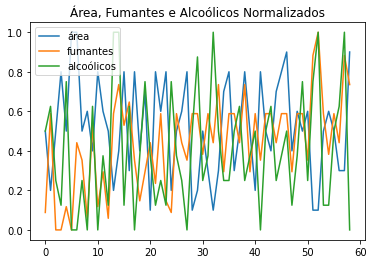

In [16]:
# plotando área, fumantes e alcoólicos em um gráfico
plt.plot(area, label='área')
plt.plot(smokes, label='fumantes')
plt.plot(alcool, label='alcoólicos')
plt.title('Área, Fumantes e Alcoólicos Normalizados')
plt.legend()
plt.show()

## 5. Organização dos dados para modelagem

In [17]:
# dados em atributos descritores e de classe
x = dados.iloc[:,1:]
x.head()

,Smokes,AreaQ,Alkhol,Result
0,3,5,4,1
1,20,2,5,1
2,0,5,2,0
3,0,8,1,0
4,4,5,6,1


In [18]:
# dados em atributos de classe
y = dados.Result
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

### Dividindo dados em treino e teste

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [21]:
x_train.head()

,Smokes,AreaQ,Alkhol,Result
14,25,4,8,1
44,15,7,2,0
26,15,6,2,0
38,25,8,2,0
19,10,7,6,1


In [22]:
y_train.head()

14    1
44    0
26    0
38    0
19    1
Name: Result, dtype: int64

## 6. Definindo algoritmo de aprendizado

In [54]:
from sklearn.neural_network import MLPClassifier

In [24]:
# definindo o modelo
classificador = DecisionTreeClassifier()

In [25]:
# treinamento do modelo
classificador.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
# fazendo a classificação
classificacao = classificador.predict(x_test)
classificacao

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

## 6. Avaliando classificador

In [27]:
# calculando acurácia
from sklearn.metrics import accuracy_score

In [28]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

1.0

In [29]:
# calculando precisão
from sklearn.metrics import precision_score

In [30]:
precisao = precision_score(y_test,classificacao)
precisao

1.0

In [31]:
# calculando recall (revocação)
from sklearn.metrics import recall_score

In [32]:
recall = recall_score(y_test,classificacao)
recall

1.0

In [33]:
# calculando f1-score
from sklearn.metrics import f1_score

In [34]:
f1 = f1_score(y_test,classificacao)
f1

1.0

### Curva ROC

In [35]:
# plotando curva roc
from sklearn.metrics  import roc_curve

In [36]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [37]:
fpr

array([0., 0., 1.])

In [38]:
tpr

array([0., 1., 1.])

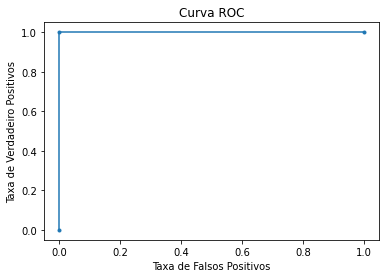

In [39]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Área sob a curva (*Area under the curve - AUC)*

In [40]:
# calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [41]:
erro = roc_auc_score(y_test,classificacao)
erro

1.0

## Validação cruzada

In [42]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [43]:
# modelo
classificador = DecisionTreeClassifier()

In [44]:
# calculando os scores
scores = cross_val_score(classificador,x,y,cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [45]:
scores.mean(),scores.std()

(1.0, 0.0)

## 8. Comparando Árvore de Decisão com Random Forest

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
# criando árvore
arvore = DecisionTreeClassifier()

In [48]:
# calculando os scores
scores_arvore = cross_val_score(arvore,x,y,cv=10)

In [49]:
# criando random forest
floresta = RandomForestClassifier()

In [50]:
# calculando os scores
scores_floresta = cross_val_score(floresta,x,y,cv=10)

In [55]:
# criando rede neural
mlp = MLPClassifier(hidden_layer_sizes=(25),activation='logistic',max_iter=50)

In [ ]:
# calculando os scores
scores_mlp = cross_val_score(mlp,x,y,cv=10)

In [57]:
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('MLP:', round(scores_mlp.mean(),3),round(scores_mlp.std(),3))

Árvore de Decisão:  1.0 0.0
Random Forest:  1.0 0.0
MLP: 0.827 0.139


## 9. Otimização de Parâmetros